In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint
import pickle, glob
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler,RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import tensorflow_addons as tfa
import tensorflow as tf
from model_evaluator import Evaluator
from sklearn.metrics import recall_score, precision_score, f1_score
from tensorflow.keras import Model, Sequential, Input, backend
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, multilabel_confusion_matrix

In [2]:
def load_data():
    X_train=pickle.load(open('/data/kjw2/CIC2018/binary/X_smote_train.pkl','rb'))
    X_test=pickle.load(open('/data/kjw2/CIC2018/binary/X_test.pkl','rb'))
    X_val=pickle.load(open('/data/kjw2/CIC2018/binary/X_val.pkl','rb'))
    y_train=pickle.load(open('/data/kjw2/CIC2018/binary/y_smote_train.pkl','rb'))
    y_val=pickle.load(open('/data/kjw2/CIC2018/binary/y_val.pkl','rb'))
    y_test=pickle.load(open('/data/kjw2/CIC2018/binary/y_test.pkl','rb'))
    return X_train, y_train, X_val, y_val, X_test, y_test

    
    

2022-09-08 21:59:54.281532: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-08 21:59:54.289405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-08 21:59:54.290062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-08 21:59:54.291020: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 30)          11520     
                                                                 
 dropout (Dropout)           (None, None, 30)          0         
                                                                 
 lstm_1 (LSTM)               (None, 30)                7320      
                                                                 
 softmax (Dense)             (None, 2)                 62        
                                                                 
Total params: 18,902
Trainable params: 18,902
Non-trainable params: 0
_________________________________________________________________


2022-09-08 21:59:55.740641: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 4454263320 exceeds 10% of free system memory.
2022-09-08 21:59:57.812865: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 4454263320 exceeds 10% of free system memory.


Epoch 1/150


2022-09-08 22:00:02.200484: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8100


267685/267685 [==============================] - 719s 3ms/step - loss: 0.1879 - precision: 0.9403 - recall: 0.9403 - accuracy: 0.9403 - f1_score: 0.9403 - val_loss: 0.3148 - val_precision: 0.9239 - val_recall: 0.9239 - val_accuracy: 0.9239 - val_f1_score: 0.7712
Epoch 2/150
267685/267685 [==============================] - 716s 3ms/step - loss: 0.1165 - precision: 0.9683 - recall: 0.9683 - accuracy: 0.9683 - f1_score: 0.9683 - val_loss: 0.3258 - val_precision: 0.9262 - val_recall: 0.9262 - val_accuracy: 0.9262 - val_f1_score: 0.7758
Epoch 3/150
267685/267685 [==============================] - 716s 3ms/step - loss: 0.1054 - precision: 0.9718 - recall: 0.9718 - accuracy: 0.9718 - f1_score: 0.9718 - val_loss: 0.3214 - val_precision: 0.9263 - val_recall: 0.9263 - val_accuracy: 0.9263 - val_f1_score: 0.7759
Epoch 4/150
267685/267685 [==============================] - 716s 3ms/step - loss: 0.1011 - precision: 0.9729 - recall: 0.9729 - accuracy: 0.9729 - f1_score: 0.9729 - val_loss: 0.3217 - v

Epoch 31/150
267685/267685 [==============================] - 721s 3ms/step - loss: 0.0844 - precision: 0.9777 - recall: 0.9777 - accuracy: 0.9777 - f1_score: 0.9777 - val_loss: 0.2387 - val_precision: 0.9280 - val_recall: 0.9280 - val_accuracy: 0.9280 - val_f1_score: 0.7825
Epoch 32/150
267685/267685 [==============================] - 721s 3ms/step - loss: 0.0843 - precision: 0.9777 - recall: 0.9777 - accuracy: 0.9777 - f1_score: 0.9777 - val_loss: 0.2355 - val_precision: 0.9280 - val_recall: 0.9280 - val_accuracy: 0.9280 - val_f1_score: 0.7826
Epoch 33/150
267685/267685 [==============================] - 721s 3ms/step - loss: 0.0842 - precision: 0.9777 - recall: 0.9777 - accuracy: 0.9777 - f1_score: 0.9777 - val_loss: 0.2344 - val_precision: 0.9281 - val_recall: 0.9281 - val_accuracy: 0.9281 - val_f1_score: 0.7827
Epoch 34/150
267685/267685 [==============================] - 721s 3ms/step - loss: 0.0841 - precision: 0.9778 - recall: 0.9778 - accuracy: 0.9778 - f1_score: 0.9778 - val_

Epoch 61/150
267685/267685 [==============================] - 721s 3ms/step - loss: 0.0820 - precision: 0.9781 - recall: 0.9781 - accuracy: 0.9781 - f1_score: 0.9781 - val_loss: 0.2078 - val_precision: 0.9291 - val_recall: 0.9291 - val_accuracy: 0.9291 - val_f1_score: 0.7875
Epoch 62/150
267685/267685 [==============================] - 722s 3ms/step - loss: 0.0819 - precision: 0.9781 - recall: 0.9781 - accuracy: 0.9781 - f1_score: 0.9781 - val_loss: 0.2101 - val_precision: 0.9289 - val_recall: 0.9289 - val_accuracy: 0.9289 - val_f1_score: 0.7872
Epoch 63/150
267685/267685 [==============================] - 722s 3ms/step - loss: 0.0818 - precision: 0.9781 - recall: 0.9781 - accuracy: 0.9781 - f1_score: 0.9781 - val_loss: 0.2082 - val_precision: 0.9291 - val_recall: 0.9291 - val_accuracy: 0.9291 - val_f1_score: 0.7875
Epoch 64/150
267685/267685 [==============================] - 722s 3ms/step - loss: 0.0818 - precision: 0.9781 - recall: 0.9781 - accuracy: 0.9781 - f1_score: 0.9781 - val_

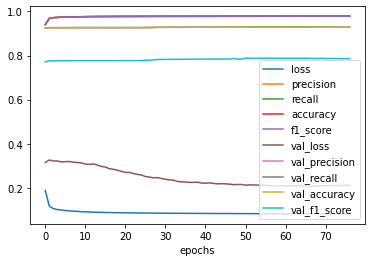

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test=load_data()
le=pickle.load(open('/data/kjw2/CIC2018/binary/bi_le.pkl','rb'))
n_classes=len(le.classes_)
X_train=X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_val=X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test=X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
y_train=tf.keras.utils.to_categorical(y_train, num_classes=n_classes)
y_val=tf.keras.utils.to_categorical(y_val, num_classes=n_classes)
y_testing=tf.keras.utils.to_categorical(y_test, num_classes=n_classes)
n_features=X_train.shape[2]

def multiClassModel(n_features, n_classes=9):
    adam=Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    model = Sequential()
    model.add(Input(shape=(None, n_features)))
    #model.add(InputLayer(shape=(None, n_features)))
    model.add(LSTM(units=30, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(units=30))
    #model.add(Dropout(0.4))
    model.add(Dense(n_classes, activation="softmax", name="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=adam, 
                  metrics=[tf.keras.metrics.Precision(name='precision'),
                          tf.keras.metrics.Recall(name='recall'),
                          'accuracy',
                           tfa.metrics.F1Score(num_classes=n_classes,
                                                average='macro')])
    model.summary()
    return model

callback=EarlyStopping(patience=10, mode='min', restore_best_weights=True)
backend.clear_session()
model=multiClassModel(n_features, n_classes)
history=model.fit(X_train, y_train, epochs=150,
                  batch_size=64, validation_data=(X_val, y_val), 
                  callbacks=[callback])
pd.DataFrame(history.history).plot(kind='line',xlabel='epochs')

import matplotlib.pyplot as plt
plt.show()

    

In [4]:
y_test_pred_prob=model.predict(X_test)
y_test_pred=np.argmax(y_test_pred_prob, axis=1)
y_test_pred_labels= le.inverse_transform(y_test_pred)
y_test_labels=le.inverse_transform(y_test)
print(classification_report(y_test_labels, 
                            y_test_pred_labels, digits=4, 
                            labels=le.classes_))


              precision    recall  f1-score   support

      Benign     0.9265    0.9975    0.9607   2519381
   Malicious     0.9621    0.4483    0.6116    361295

    accuracy                         0.9286   2880676
   macro avg     0.9443    0.7229    0.7861   2880676
weighted avg     0.9310    0.9286    0.9169   2880676



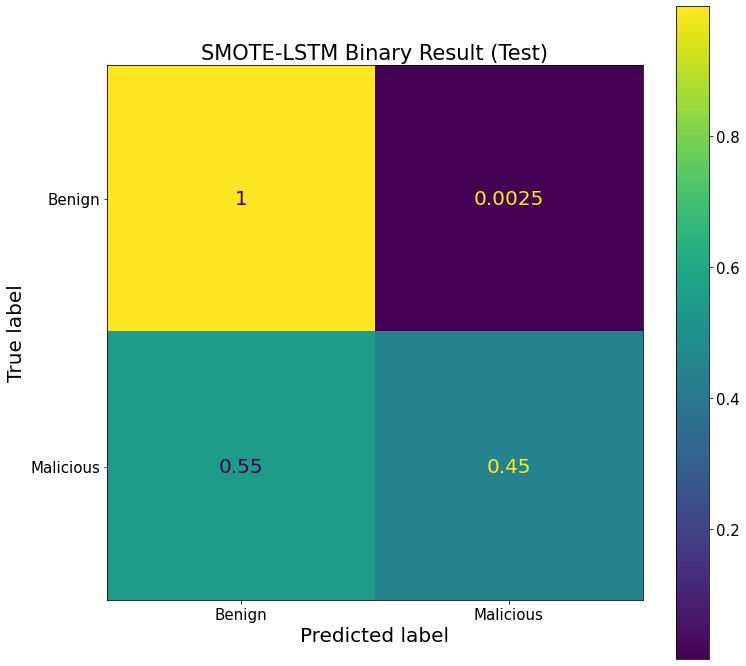

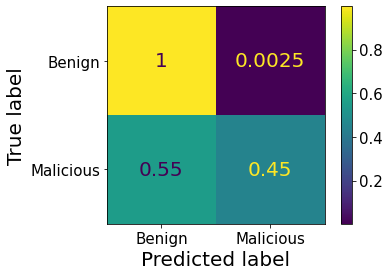

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from numpy import argmax

%matplotlib inline
bi_y_test3=argmax(y_testing, axis=1)
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=10)  # 범례 폰트 크기
plt.rc('figure', titlesize=80) # figure title 폰트 크기

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('SMOTE-LSTM Binary Result (Test)',fontdict={'size':'21'})

ConfusionMatrixDisplay.from_predictions(bi_y_test3, y_test_pred, display_labels=le.classes_, normalize='true').plot(ax=ax)